<a href="https://colab.research.google.com/github/Meghamala/Startup_Success_Prediction/blob/Lokesh/Final_project577.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("startup_data.csv.xls")

In [3]:
df.shape

(923, 49)

In [4]:
df.dtypes

Unnamed: 0                    int64
state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
id                           object
city                         object
Unnamed: 6                   object
name                         object
labels                        int64
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate               

In [5]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [6]:
df.head().T

,0,1,2,3,4
Unnamed: 0,1005,204,1001,738,1002
state_code,CA,CA,CA,CA,CA
latitude,42.35888,37.238916,32.901049,37.320309,37.779281
longitude,-71.05682,-121.973718,-117.192656,-122.05004,-122.419236
zip_code,92101,95032,92121,95014,94105
id,c:6669,c:16283,c:65620,c:42668,c:65806
city,San Diego,Los Gatos,San Diego,Cupertino,San Francisco
Unnamed: 6,NaN,NaN,San Diego CA 92121,Cupertino CA 95014,San Francisco CA 94105
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital
labels,1,1,1,1,0


In [7]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

# Data Cleaning


In [8]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [9]:
df2= df.drop(['Unnamed: 6','age_first_milestone_year','age_last_milestone_year','Unnamed: 0'],axis= 'columns')

In [10]:
df2.isnull().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
closed_at                 588
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                1
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consult

In [11]:
df2.shape

(923, 45)

Converting the object type to datetime type


In [12]:
# Converting found_at column which is of object type to date time data type
# founded_at                   object
# closed_at                    object
# first_funding_at             object
# last_funding_at              object

df2['founded_at'] = pd.to_datetime(df2['founded_at'], errors='coerce')
df2['closed_at'] = pd.to_datetime(df2['closed_at'], errors='coerce')
df2['first_funding_at'] = pd.to_datetime(df2['first_funding_at'], errors='coerce')
df2['last_funding_at'] = pd.to_datetime(df2['last_funding_at'], errors='coerce')

In [13]:
# Converting the status to 0 and 1
df2['status'] = df2['status'].replace({'acquired': 1, 'closed': 0})
df2['status']

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int64

Check for closed_at(data cleaning) because there are comapanies which are still running.

In [14]:
df2.loc[5, ['closed_at','status']]

closed_at    2009-02-15 00:00:00
status                         0
Name: 5, dtype: object

In [15]:
df4 = df2[df2['closed_at'].notna()]['status']
print(df4)


4      0
5      0
11     0
12     0
15     0
      ..
911    0
913    0
915    0
919    0
920    0
Name: status, Length: 335, dtype: int64


In [16]:
df2['is_still_running'] = df2['closed_at'].isna() # is_still_running is column added to the df2
df2['closed_at'].fillna(value='Not_Closed', inplace=True)
df2

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,is_still_running
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,2007-01-01,Not_Closed,...,0,1,0,0,0,0,1.0000,0,1,True
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,2000-01-01,Not_Closed,...,1,0,0,1,1,1,4.7500,1,1,True
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,2009-03-18,Not_Closed,...,0,0,1,0,0,0,4.0000,1,1,True
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,2002-01-01,Not_Closed,...,0,0,0,1,1,1,3.3333,1,1,True
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,2010-08-01,2012-10-01 00:00:00,...,1,1,0,0,0,0,1.0000,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,37.740594,-122.376471,94107,c:21343,San Francisco,CoTweet,1,2009-01-01,Not_Closed,...,0,0,1,0,0,0,6.0000,1,1,True
919,MA,42.504817,-71.195611,1803,c:41747,Burlington,Reef Point Systems,0,1998-01-01,2008-06-25 00:00:00,...,1,0,0,1,0,0,2.6667,1,0,False
920,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,Paracor Medical,0,1999-01-01,2012-06-17 00:00:00,...,0,0,0,0,0,1,8.0000,1,0,False
921,CA,37.556732,-122.288378,94404,c:33198,San Francisco,Causata,1,2009-01-01,Not_Closed,...,0,0,1,1,0,0,1.0000,1,1,True


In [17]:
df2.isnull().sum()

state_code                0
latitude                  0
longitude                 0
zip_code                  0
id                        0
city                      0
name                      0
labels                    0
founded_at                0
closed_at                 0
first_funding_at          0
last_funding_at           0
age_first_funding_year    0
age_last_funding_year     0
relationships             0
funding_rounds            0
funding_total_usd         0
milestones                0
state_code.1              1
is_CA                     0
is_NY                     0
is_MA                     0
is_TX                     0
is_otherstate             0
category_code             0
is_software               0
is_web                    0
is_mobile                 0
is_enterprise             0
is_advertising            0
is_gamesvideo             0
is_ecommerce              0
is_biotech                0
is_consulting             0
is_othercategory          0
object_id           

In [18]:
df2.head().T

,0,1,2,3,4
state_code,CA,CA,CA,CA,CA
latitude,42.35888,37.238916,32.901049,37.320309,37.779281
longitude,-71.05682,-121.973718,-117.192656,-122.05004,-122.419236
zip_code,92101,95032,92121,95014,94105
id,c:6669,c:16283,c:65620,c:42668,c:65806
city,San Diego,Los Gatos,San Diego,Cupertino,San Francisco
name,Bandsintown,TriCipher,Plixi,Solidcore Systems,Inhale Digital
labels,1,1,1,1,0
founded_at,2007-01-01 00:00:00,2000-01-01 00:00:00,2009-03-18 00:00:00,2002-01-01 00:00:00,2010-08-01 00:00:00
closed_at,Not_Closed,Not_Closed,Not_Closed,Not_Closed,2012-10-01 00:00:00


Check for columns which have same value.


In [19]:
df2[['state_code','state_code.1']]  # state_code and state_code.1 is equal so removing either one.

,state_code,state_code.1
0,CA,CA
1,CA,CA
2,CA,CA
3,CA,CA
4,CA,CA
...,...,...
918,CA,CA
919,MA,MA
920,CA,CA
921,CA,CA


In [20]:
df2[['labels','status']]  # labels and status is equal so removing either one.

,labels,status
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
918,1,1
919,0,0
920,0,0
921,1,1


In [21]:
are_l_and_s_equal = (df2['labels'] == df2['status'])
count1 = (~are_l_and_s_equal).sum()
print(count1)

0


In [22]:
are_rows_equal = (df2['state_code'] == df2['state_code.1'])
count2 = (~are_rows_equal).sum()
print(count2)
false_indices = are_rows_equal.index[~are_rows_equal].tolist()
print(false_indices)
# false_rows = df[~df['boolean_column']]

1
[515]


In [23]:
df2.loc[515, ['state_code','state_code.1']]

state_code       CA
state_code.1    NaN
Name: 515, dtype: object

In [24]:
df3 = df2.drop(['state_code.1','labels'],axis="columns")
df3.shape

(923, 44)

Check for negative values which are outliers

In [25]:

def check_negative(df,all_columns):
  for column in all_columns:
      if column == "latitude" or column == "longitude" or column =="is_still_running" or df[column].dtype not in [int, float]:
          continue
      else:
          has_negative_values = (df[column] < 0).any()
          if has_negative_values:
              print("Negative value in '{}' column: {}".format(column, has_negative_values))


In [26]:
check_negative(df3,df3.columns)

Negative value in 'age_first_funding_year' column: True
Negative value in 'age_last_funding_year' column: True


In [27]:
df4=df3.drop(df3[df3.age_first_funding_year<0].index)
df4=df4.drop(df4[df4.age_last_funding_year<0].index)

In [28]:
check_negative(df4,df4.columns)

In [29]:
df4.shape

(877, 44)

In [30]:
df4.dtypes

state_code                        object
latitude                         float64
longitude                        float64
zip_code                          object
id                                object
city                              object
name                              object
founded_at                datetime64[ns]
closed_at                         object
first_funding_at          datetime64[ns]
last_funding_at           datetime64[ns]
age_first_funding_year           float64
age_last_funding_year            float64
relationships                      int64
funding_rounds                     int64
funding_total_usd                  int64
milestones                         int64
is_CA                              int64
is_NY                              int64
is_MA                              int64
is_TX                              int64
is_otherstate                      int64
category_code                     object
is_software                        int64
is_web          

# Finding Correlation between the columns and finding features for the model

In [31]:
correlation_matrix = df4.corr()

<ipython-input-31-7481d6416c60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df4.corr()


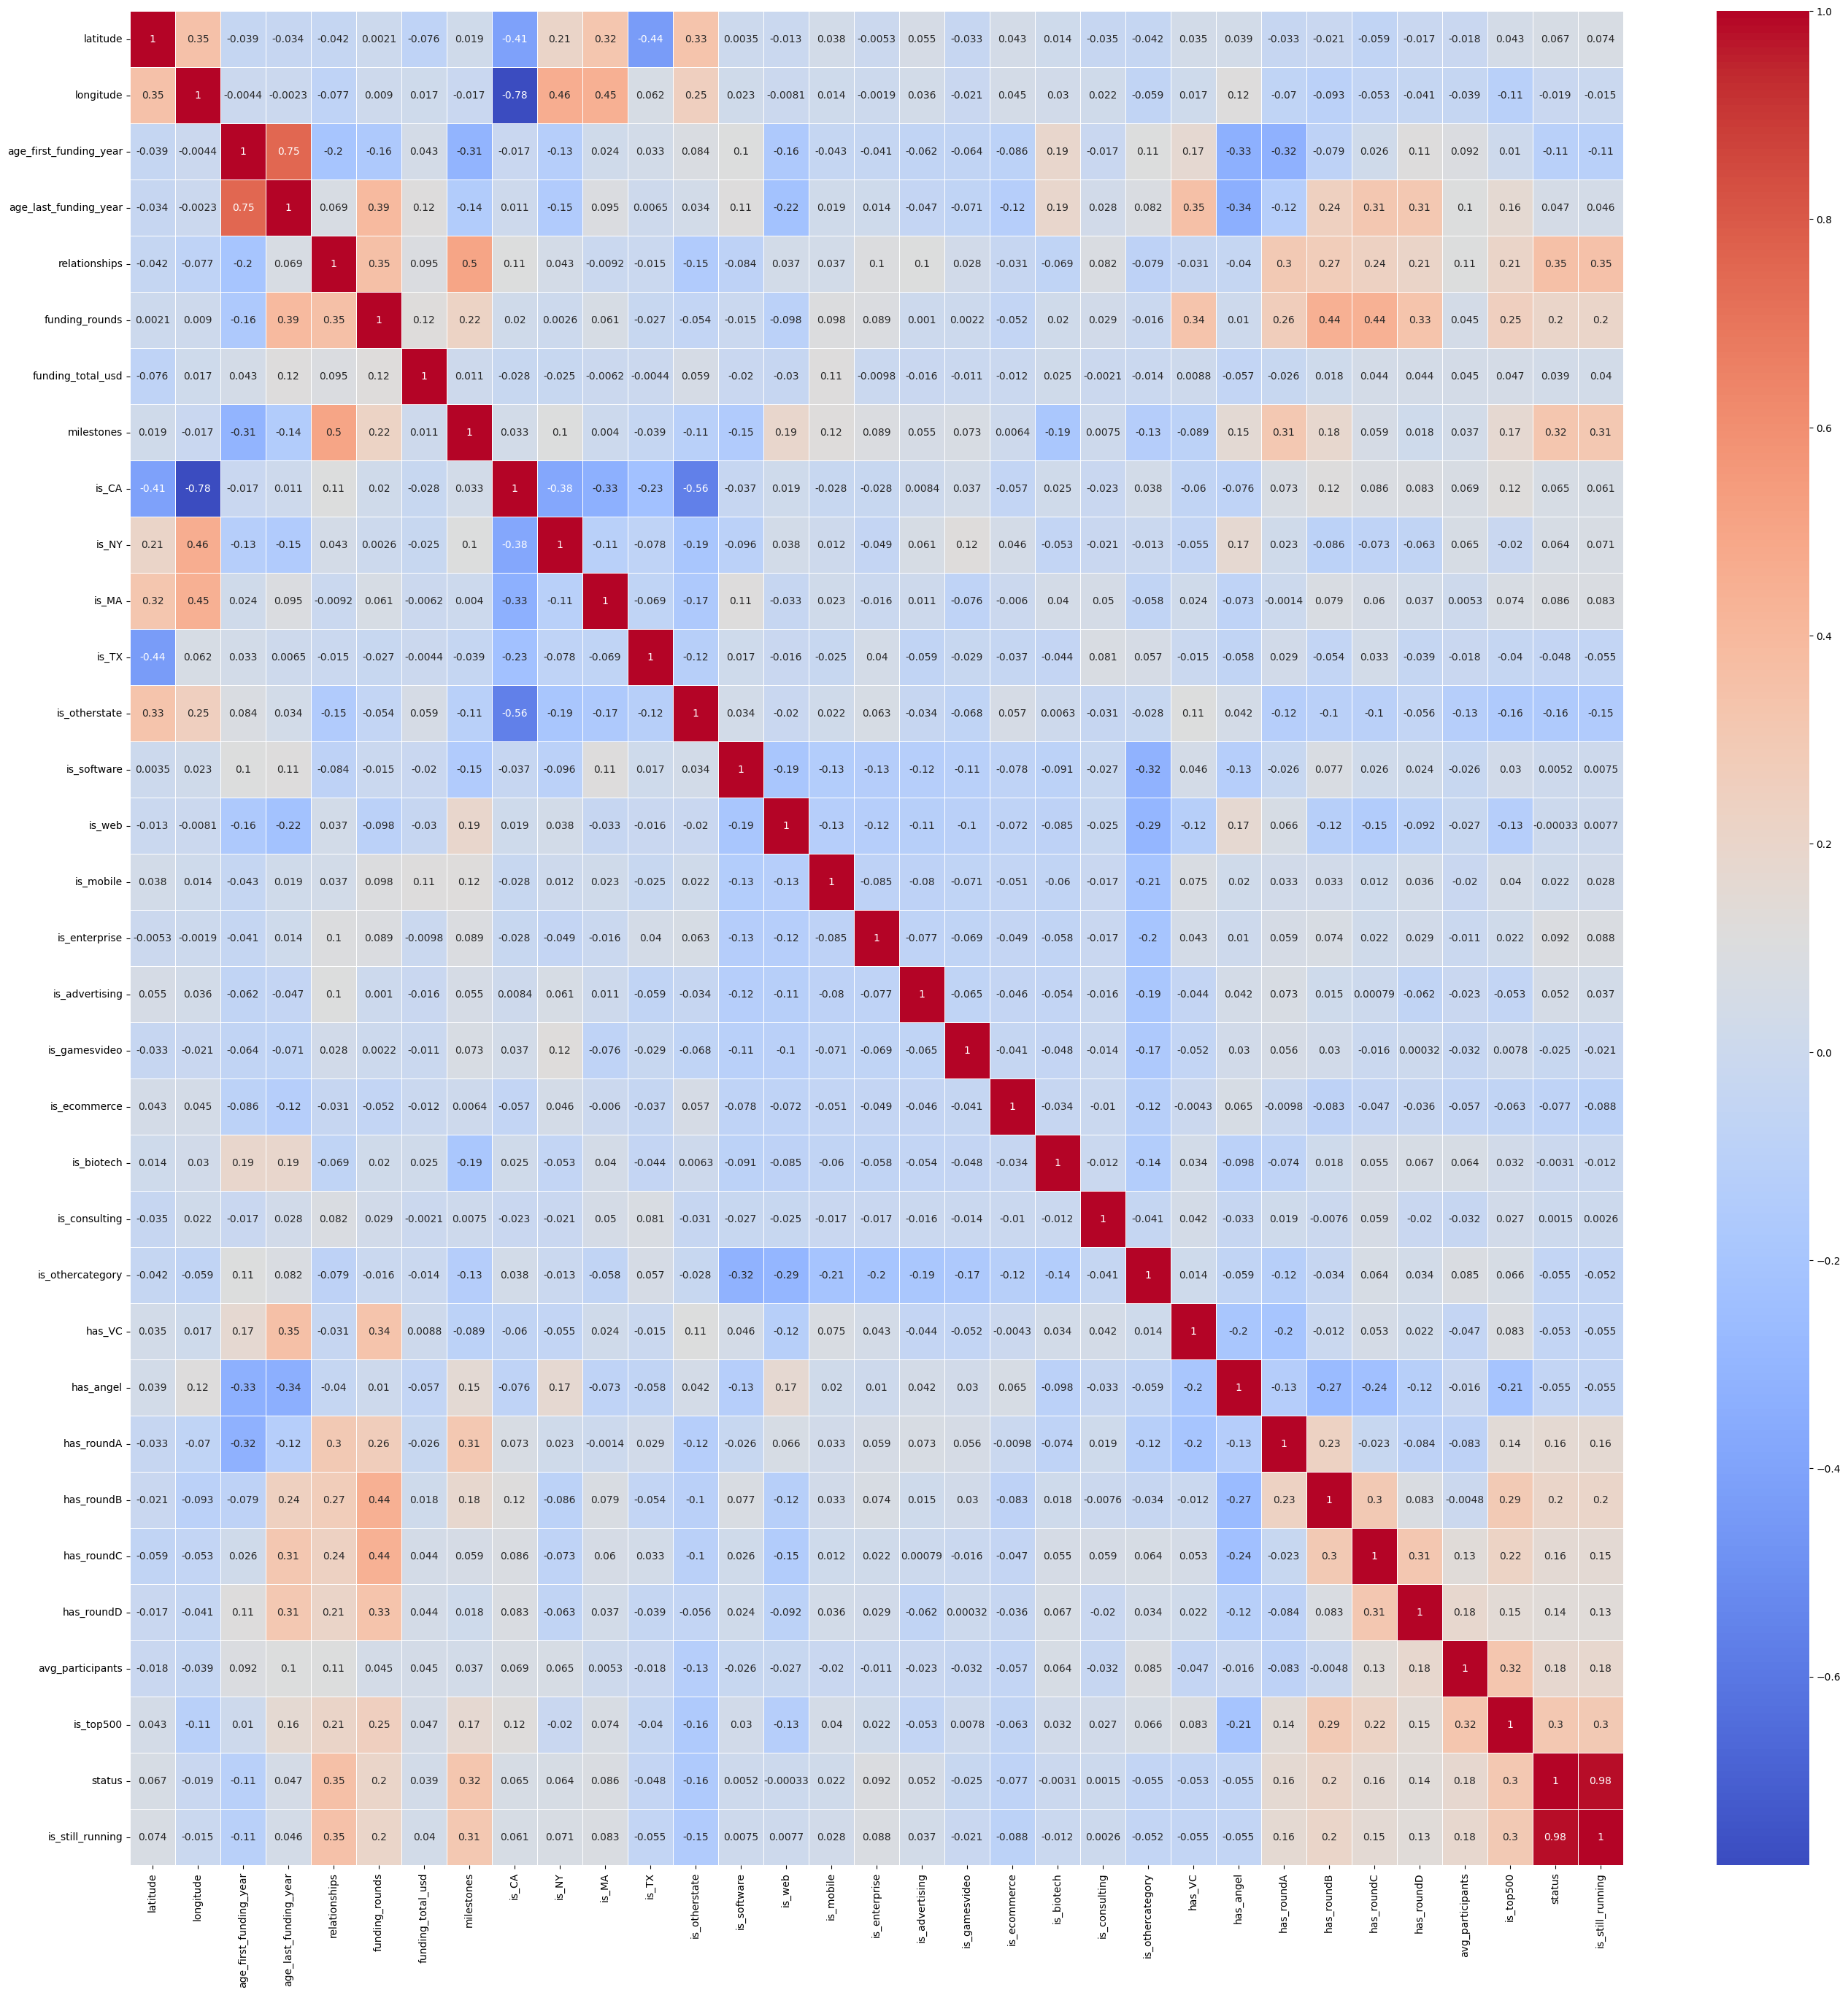

In [32]:
plt.figure(figsize=(33,33))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

In [33]:
#Choosing the top 10 features which affects the status
top_features = correlation_matrix.nlargest(11, 'status')['status'].index[1:]
top_features.drop("is_still_running")

Index(['relationships', 'milestones', 'is_top500', 'funding_rounds',
       'has_roundB', 'avg_participants', 'has_roundA', 'has_roundC',
       'has_roundD'],
      dtype='object')

In [34]:
df_acquired = df4[(df4["status"] == True)]
df_acquired.shape

(574, 44)

In [35]:
df_closed = df4[(df4["status"] == False)]
df_closed.shape

(303, 44)

### Visualization and Exploratory Data Analysis

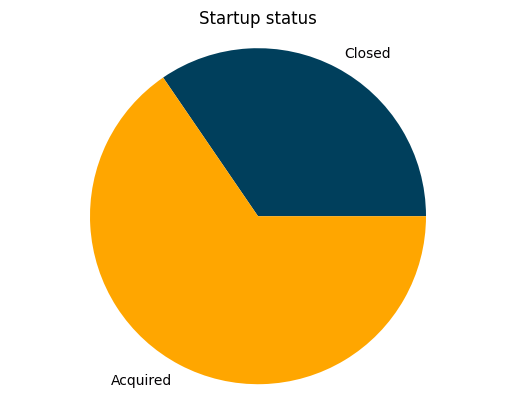

In [36]:
value_counts = df4["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['Closed', 'Acquired'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup status')


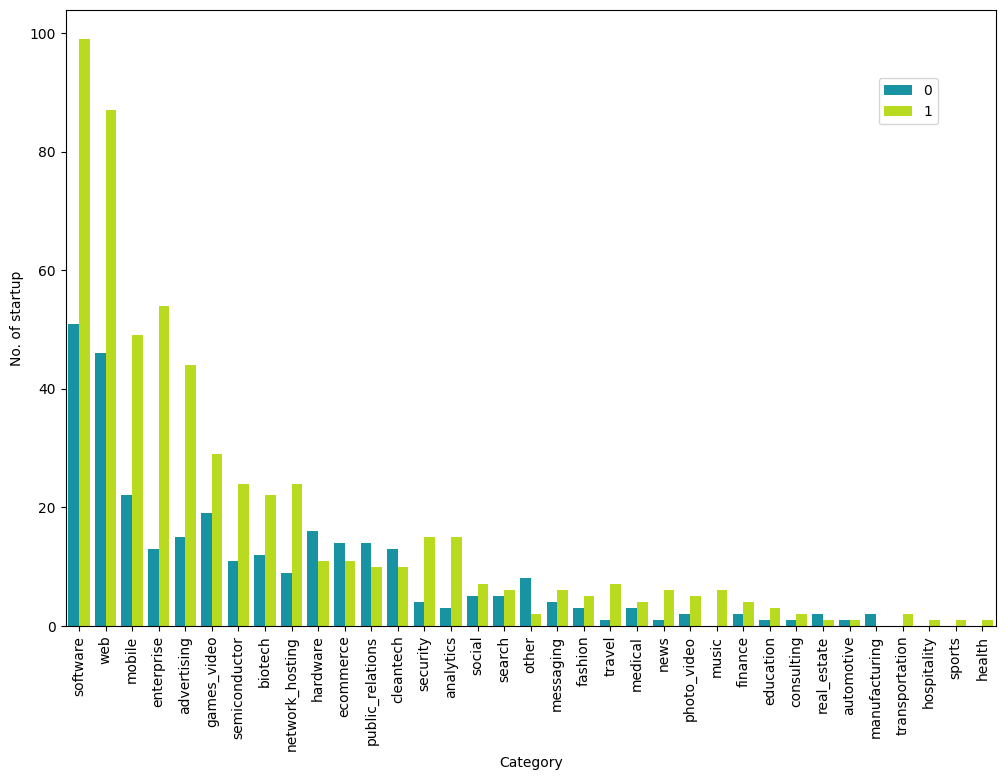

In [37]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=df4, palette="nipy_spectral",
              order=df4.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

Checking different categories which as high success rate

In [38]:
data1 = df4[df4['status'] == 1].groupby(['category_code']).agg({'status': 'count'}).reset_index()
data1.columns = ['category_code', 'total_success']

data2 = df4[df4['status'] == 0].groupby(['category_code']).agg({'status': 'count'}).reset_index()
data2.columns = ['category_code', 'total_closed']

data3 = df4.groupby(['category_code']).agg({'status': 'count'}).reset_index()
data3.columns = ['category_code', 'total_startup']

data1 = data1.merge(data2, on='category_code')
data1 = data1.merge(data3, on='category_code')

data1['success_rate'] = round((data1['total_success'] / data1['total_startup']) * 100, 2)

most_success_rate = data1.sort_values('success_rate', ascending=False)
print(most_success_rate)


       category_code  total_success  total_closed  total_startup  success_rate
27            travel              7             1              8         87.50
17              news              6             1              7         85.71
1          analytics             15             3             18         83.33
8         enterprise             54            13             67         80.60
23          security             15             4             19         78.95
7          education              3             1              4         75.00
0        advertising             44            15             59         74.58
16   network_hosting             24             9             33         72.73
19       photo_video              5             2              7         71.43
15            mobile             49            22             71         69.01
24     semiconductor             24            11             35         68.57
5         consulting              2             1   

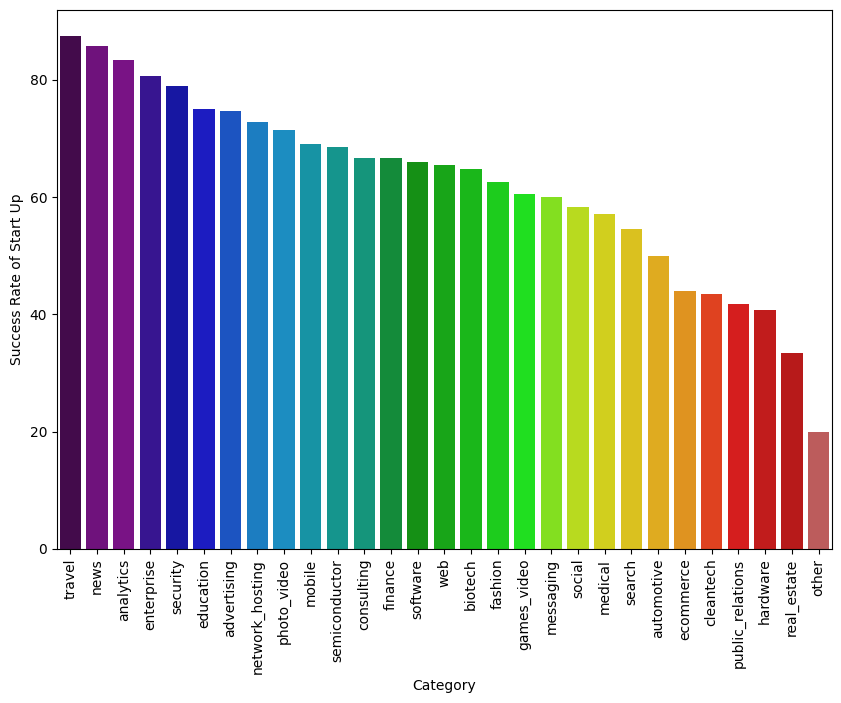

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data= most_success_rate,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")


Comparing different category with funding_total

In [40]:
funding_sorted_category = pd.pivot_table(df,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head(10)


,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096
4,cleantech,1300284730
28,semiconductor,1105156970
0,advertising,918619012
11,games_video,844643530
12,hardware,773938873


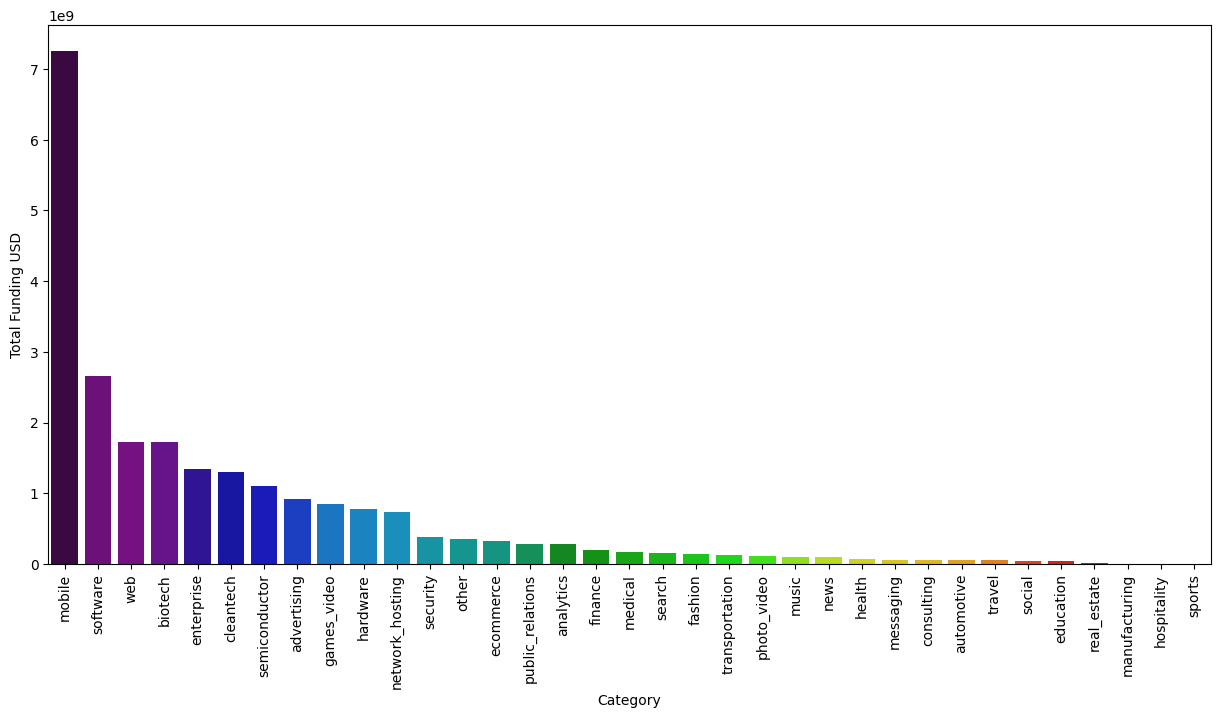

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Funding USD")


Comparing states with total startups

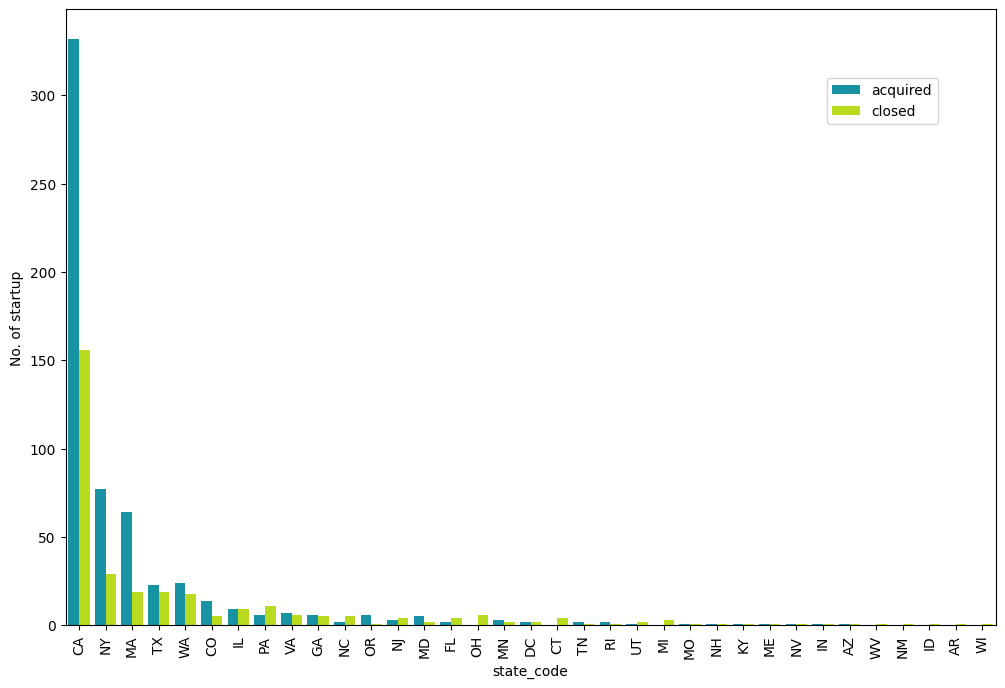

In [42]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=df, palette="nipy_spectral",
              order=df.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))


In [43]:
trending_statea = df.groupby(['state_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea


,state_code,num_startup
2,CA,488
23,NY,106
12,MA,83
32,WA,42
29,TX,42
3,CO,19
9,IL,18
26,PA,17
31,VA,13
7,GA,11


State having most number of acquired Startup per category

In [44]:
trending_statea = df_acquired.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statea = trending_statea[trending_statea.groupby('state_code')['num_startup'].transform(max) == trending_statea['num_startup']]
most_trending_statea = most_trending_statea.sort_values('num_startup', ascending=False)
most_trending_statea.head(10)


,state_code,category_code,num_startup
26,CA,software,52
69,MA,software,16
108,NY,web,13
140,WA,mobile,5
125,TX,enterprise,4
132,TX,web,4
50,IL,software,4
36,CO,software,4
43,GA,enterprise,2
134,VA,mobile,2


State having most number of closed Startup per category

In [45]:
trending_statec = df_closed.groupby(['state_code','category_code']).size().rename('num_startup').reset_index()

most_trending_statec = trending_statec[trending_statec.groupby('state_code')['num_startup'].transform(max) == trending_statec['num_startup']]
most_trending_statec = most_trending_statec.sort_values('num_startup', ascending=False)
most_trending_statec

,state_code,category_code,num_startup
27,CA,web,22
60,MA,software,8
92,NY,web,6
118,TX,software,5
132,WA,web,4
51,IL,web,3
43,GA,software,2
39,FL,software,2
94,OH,ecommerce,2
102,PA,games_video,2


city having most number of acquired Startup per category

In [46]:
trending_categorya = df_acquired.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categorya = trending_categorya[trending_categorya.groupby('city')['num_startup'].transform(max) == trending_categorya['num_startup']]
most_trending_categorya = most_trending_categorya.sort_values('num_startup', ascending=False)
most_trending_categorya


,city,category_code,num_startup
268,San Francisco,web,23
190,New York,web,13
164,Mountain View,web,9
282,San Mateo,software,9
324,Sunnyvale,software,8
...,...,...,...
115,Kansas City,mobile,1
116,Kirkland,enterprise,1
117,Kirkland,mobile,1
118,La Jolla,mobile,1


City having most number of closed Startup per category

In [47]:
trending_categoryc = df_closed.groupby(['city','category_code']).size().rename('num_startup').reset_index()

most_trending_categoryc = trending_categoryc[trending_categoryc.groupby('city')['num_startup'].transform(max) == trending_categoryc['num_startup']].reset_index()
most_trending_categoryc = most_trending_categoryc.sort_values('num_startup', ascending=False)
most_trending_categoryc


,index,city,category_code,num_startup
133,203,Santa Clara,software,5
129,188,San Jose,hardware,5
95,129,New York,games_video,4
130,196,San Mateo,web,4
127,185,San Francisco,web,4
...,...,...,...,...
55,69,Fremont,software,1
56,70,Glendale,ecommerce,1
57,71,Golden Valley,enterprise,1
58,72,Henderson,analytics,1


 Startup have is_top500

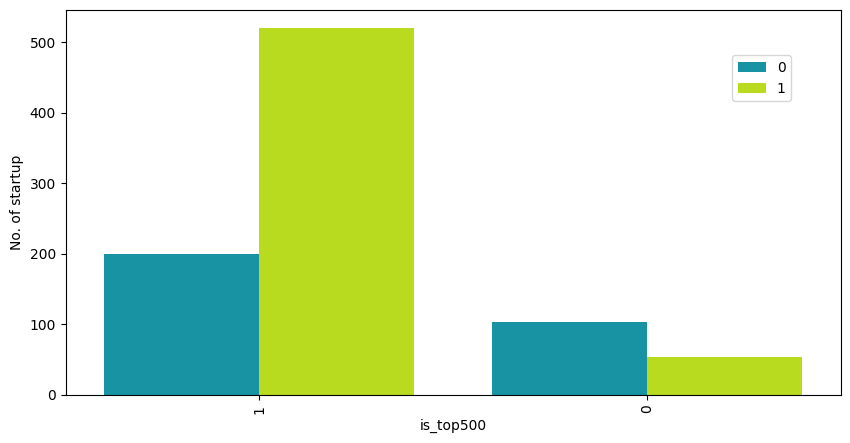

In [48]:
fig, ax = plt.subplots(figsize=(10,5))

_ = sns.countplot(x="is_top500", hue="status", data=df4, palette="nipy_spectral",
              order=df4.is_top500.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="is_top500", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))


In [49]:
#How many Startup have both 'acquired' status and is_top500?
len(df4[(df4["status"] == True) & (df4["is_top500"] == True)].index)

520

In [50]:
#How many Startup have both 'closed' status and is_top500?
len(df4[(df4["status"] == False) & (df4["is_top500"] == False)].index)

103

### Modeling

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, roc_auc_score, roc_curve
import sklearn.linear_model as lm
from sklearn.preprocessing import LabelEncoder


In [52]:
#dropping columns to train the model,taking only numeric columns
columns_to_drop = ['founded_at', 'first_funding_at','last_funding_at','closed_at','category_code','object_id','state_code','zip_code','id','city','name']

# Create a new DataFrame without the specified columns
df5 = df4.drop(columns=columns_to_drop)

In [53]:
df5.dtypes
# df4.shape

latitude                  float64
longitude                 float64
age_first_funding_year    float64
age_last_funding_year     float64
relationships               int64
funding_rounds              int64
funding_total_usd           int64
milestones                  int64
is_CA                       int64
is_NY                       int64
is_MA                       int64
is_TX                       int64
is_otherstate               int64
is_software                 int64
is_web                      int64
is_mobile                   int64
is_enterprise               int64
is_advertising              int64
is_gamesvideo               int64
is_ecommerce                int64
is_biotech                  int64
is_consulting               int64
is_othercategory            int64
has_VC                      int64
has_angel                   int64
has_roundA                  int64
has_roundB                  int64
has_roundC                  int64
has_roundD                  int64
avg_participan

In [54]:
X = df5.drop(['status'], axis = 1)
y = df5['status']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.35, random_state = 0)

# This is for entire columns in the dataset.

In [55]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = model.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
precision = precision_score(ytest, y_pred)
recall = recall_score(ytest, y_pred)
f1 = f1_score(ytest, y_pred)

print('LogisticRegression Accuracy: %f' % accuracy)
print('LogisticRegression Precision: %f' % precision)
print('LogisticRegression Recall: %f' % recall)
print('LogisticRegression F1-Score: %f' % f1)


LogisticRegression Accuracy: 0.654723
LogisticRegression Precision: 0.654723
LogisticRegression Recall: 1.000000
LogisticRegression F1-Score: 0.791339


## This is for only the selected feature

In [56]:
# features = top_features.drop(['is_still_running','has_roundC','has_roundA','has_roundD','has_roundB'])
selected_columns = ['relationships', 'milestones', 'is_top500','funding_rounds','avg_participants','is_CA','is_NY','is_TX','is_MA','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_mobile','is_othercategory','funding_total_usd','has_VC','status']

In [57]:
df6 = df5[selected_columns].copy()
df6.dtypes

relationships          int64
milestones             int64
is_top500              int64
funding_rounds         int64
avg_participants     float64
is_CA                  int64
is_NY                  int64
is_TX                  int64
is_MA                  int64
is_otherstate          int64
is_software            int64
is_web                 int64
is_mobile              int64
is_enterprise          int64
is_mobile              int64
is_othercategory       int64
funding_total_usd      int64
has_VC                 int64
status                 int64
dtype: object

In [58]:
print(df6[df6.index.duplicated()])

Empty DataFrame
Columns: [relationships, milestones, is_top500, funding_rounds, avg_participants, is_CA, is_NY, is_TX, is_MA, is_otherstate, is_software, is_web, is_mobile, is_enterprise, is_mobile, is_othercategory, funding_total_usd, has_VC, status]
Index: []


In [59]:
df6[df6.index.duplicated()]



,relationships,milestones,is_top500,funding_rounds,avg_participants,is_CA,is_NY,is_TX,is_MA,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_mobile,is_othercategory,funding_total_usd,has_VC,status


In [60]:
def remove_outliers(df, columns_to_remove_outliers):
 for i in range(0, len(columns_to_remove_outliers)):
   q1 = df[columns_to_remove_outliers[i]].quantile(0.25)
   q3 = df[columns_to_remove_outliers[i]].quantile(0.75)
   iqr = q3 - q1
   lower_bound = q1 - 1.5 * iqr
   upper_bound = q3 + 1.5 * iqr
   cleaned_data = df[(df[columns_to_remove_outliers[i]] >= lower_bound) &
                     (df[columns_to_remove_outliers[i]] <= upper_bound)]
   return cleaned_data

columns_to_remove_outliers=['relationships', 'milestones', 'is_top500','funding_rounds','avg_participants','is_CA','is_NY','is_TX','is_MA','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_othercategory','funding_total_usd','has_VC','status']

df7=remove_outliers(df6,columns_to_remove_outliers)
print(df7.shape)



(822, 19)


In [61]:
X2 = df7.drop(['status'], axis = 1)
y2 = df7['status']

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y2, test_size = 0.30, random_state = 0)

In [62]:
# Create a logistic regression model
model2 = LogisticRegression()

# Train the model on the training set
model2.fit(xtrain2, ytrain2)

# Make predictions on the test set
y_pred2 = model2.predict(xtest2)

accuracy = accuracy_score(ytest2, y_pred2)
precision = precision_score(ytest2, y_pred2)
recall = recall_score(ytest2, y_pred2)
f1 = f1_score(ytest2, y_pred2)

print('LogisticRegression Accuracy: %f' % accuracy)
print('LogisticRegression Precision: %f' % precision)
print('LogisticRegression Recall: %f' % recall)
print('LogisticRegression F1-Score: %f' % f1)

LogisticRegression Accuracy: 0.663968
LogisticRegression Precision: 0.663968
LogisticRegression Recall: 1.000000
LogisticRegression F1-Score: 0.798054


In [63]:
# Print a classification report
print("Classification Report:\n", classification_report(ytest2, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.66      1.00      0.80       164

    accuracy                           0.66       247
   macro avg       0.33      0.50      0.40       247
weighted avg       0.44      0.66      0.53       247



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# Print the confusion matrix
conf_matrix = confusion_matrix(ytest2, y_pred2)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[  0  83]
 [  0 164]]


In [65]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(ytest2, model2.predict_proba(xtest2)[:, 1])
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.6255509844255069


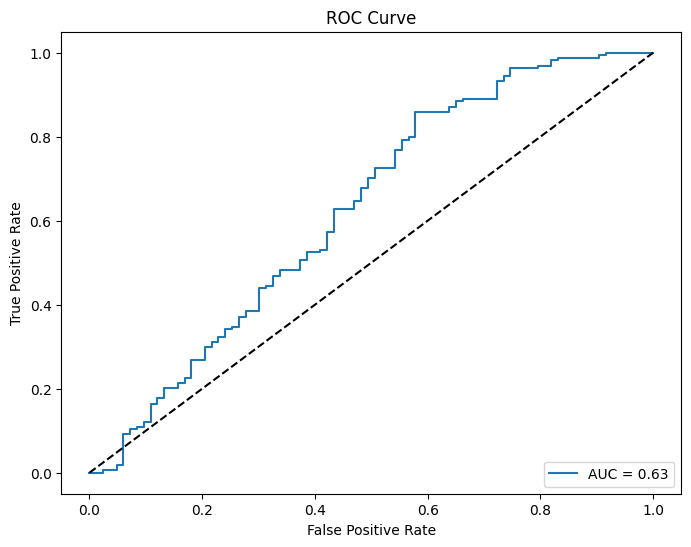

In [66]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(ytest2, model2.predict_proba(xtest2)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(xtrain,ytrain)

y_pred_rf = rf.predict(xtest)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

------------------------------------------
------------------------------------------
Training Accuracy for Random Forest: 1.0
Training Accuracy for Random Forest: 0.993485342019544
------------------------------------------
Confusion Matrix for Random Forest:


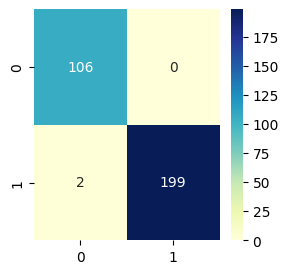

Classification Report for Random Forest:
------------------------------------------
              precision    recall  f1-score   support

      Closed       0.98      1.00      0.99       106
    Acquired       1.00      0.99      0.99       201

    accuracy                           0.99       307
   macro avg       0.99      1.00      0.99       307
weighted avg       0.99      0.99      0.99       307

Precision-Recall Curves for Random Forest= 0.9982822046121186


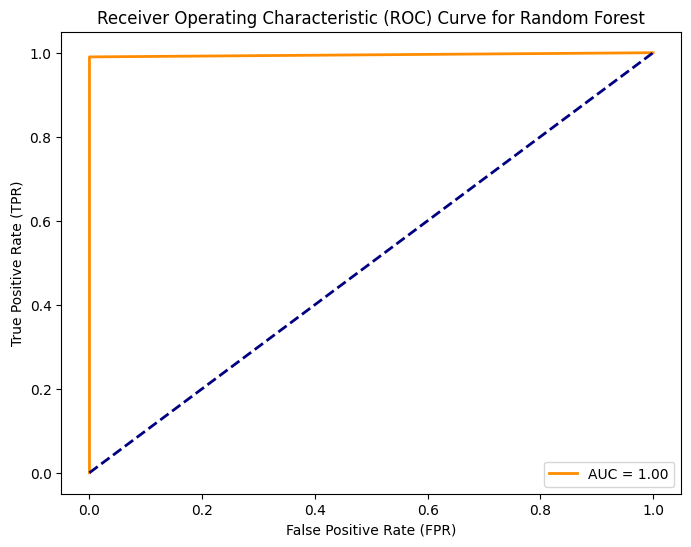

In [71]:
# Evaluations:

#Accuracy for all models

def evaluation_metric(X_train, X_test, y_train, y_test, y_pred, name, model):

    print("------------------------------------------")
    print("------------------------------------------")
    print(f"Training Accuracy for {name}:" , model.score(X_train, y_train))
    print(f"Training Accuracy for {name}:", model.score(X_test, y_test))

    print("------------------------------------------")
    # Confusion Matrix for RF
    print(f"Confusion Matrix for {name}:")
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams['figure.figsize'] = (3, 3)
    sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
    plt.show()

    # #Classification report having precision recall f1score support
    print(f"Classification Report for {name}:")
    print("------------------------------------------")
    cr = classification_report(y_test, y_pred, target_names=['Closed','Acquired'])
    print(cr)

    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    Precision_Recall = auc(recall, precision)
    print(f"Precision-Recall Curves for {name}=",Precision_Recall)

def plot_roc_models(y_test, y_pred, name):


    # roc_auc = auc(false_positive_rate, true_positive_rate)
    # print("ROC Curves              =",roc_auc)

    # Calculate the Area Under the Receiver Operating Characteristic curve (AUC-ROC)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Plot the ROC curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc='lower right')
    plt.show()

# evaluation_metric(X_train, X_test, y_train, y_test, y_pred_lr, "Logistic Regression", lr)
# evaluation_metric(X_train, X_test, y_train, y_test, y_pred_dt, "Decision Tree", dt)
evaluation_metric(xtrain, xtest, ytrain, ytest, y_pred_rf, "Random Forest", rf)

# plot_roc_models(y_test, y_pred_lr, "Logistic Regression")
# plot_roc_models(y_test, y_pred_dt,"Decision Tree")
plot_roc_models(ytest, y_pred_rf, "Random Forest")

# model comparison

# model_names = ['Logistic Regression', 'Decision Tree','Random Forest' ]  # Replace with your model names
# accuracy_scores = [lr.score(X_test, y_test), dt.score(X_test, y_test), rf.score(X_test, y_test)]  # Replace with your accuracy scores

# # Plotting the bar chart
# plt.figure(figsize=(10, 6))
# plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange'])  # Adjust colors as needed
# plt.xlabel('Models')
# plt.ylabel('Accuracy')
# plt.title('Comparison of Model Accuracy')
# plt.ylim(0, 1)  # Set the y-axis range to be between 0 and 1 for accuracy scores
# plt.show()

In [72]:

rf2 = RandomForestClassifier()

rf2.fit(xtrain2,ytrain2)

y_pred_rf2 = rf2.predict(xtest2)

------------------------------------------
------------------------------------------
Training Accuracy for Random Forest: 1.0
Training Accuracy for Random Forest: 0.7773279352226721
------------------------------------------
Confusion Matrix for Random Forest:


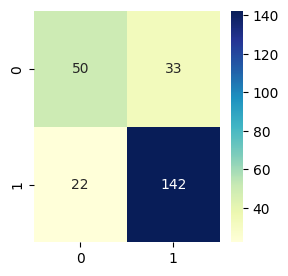

Classification Report for Random Forest:
------------------------------------------
              precision    recall  f1-score   support

      Closed       0.69      0.60      0.65        83
    Acquired       0.81      0.87      0.84       164

    accuracy                           0.78       247
   macro avg       0.75      0.73      0.74       247
weighted avg       0.77      0.78      0.77       247

Precision-Recall Curves for Random Forest= 0.883175527938044


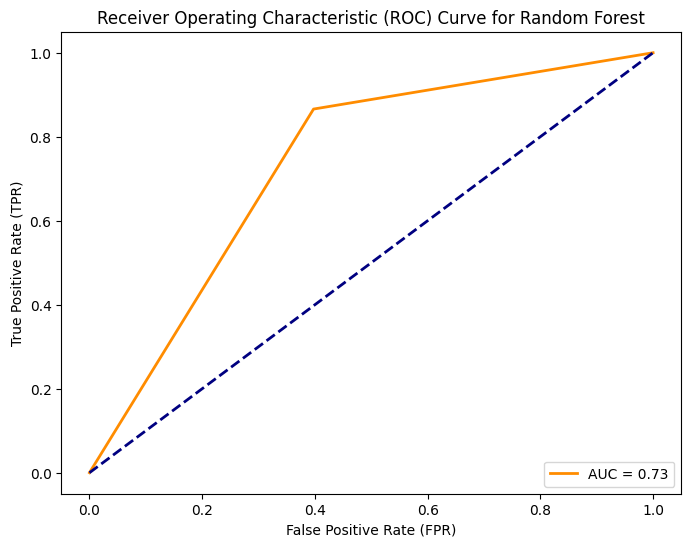

In [73]:
evaluation_metric(xtrain2, xtest2, ytrain2, ytest2, y_pred_rf2, "Random Forest", rf2)
plot_roc_models(ytest2, y_pred_rf2, "Random Forest")


In [79]:
top_features

Index(['is_still_running', 'relationships', 'milestones', 'is_top500',
       'funding_rounds', 'has_roundB', 'avg_participants', 'has_roundA',
       'has_roundC', 'has_roundD'],
      dtype='object')

In [81]:
df7 = df5[top_features].copy()
df7

,is_still_running,relationships,milestones,is_top500,funding_rounds,has_roundB,avg_participants,has_roundA,has_roundC,has_roundD
0,True,3,3,0,3,0,1.0000,0,0,0
1,True,9,1,1,4,1,4.7500,0,1,1
2,True,5,2,1,1,0,4.0000,1,0,0
3,True,5,1,1,3,1,3.3333,0,1,1
4,False,2,1,1,2,0,1.0000,0,0,0
...,...,...,...,...,...,...,...,...,...,...
918,True,9,2,1,1,0,6.0000,1,0,0
919,False,1,1,1,3,1,2.6667,0,0,0
920,False,5,1,1,1,0,8.0000,0,0,1
921,True,12,2,1,2,1,1.0000,1,0,0


In [83]:
# X2 = df7.drop(['status'], axis = 1)
# y2 = df7['status']
X3 = df7
Y3 = df6['status']


xtrain3, xtest3, ytrain3, ytest3 = train_test_split(X3, Y3, test_size = 0.20, random_state = 42)

In [87]:
rf3 = RandomForestClassifier()

rf3.fit(xtrain3,ytrain3)

y_pred_rf3 = rf3.predict(xtest3)


------------------------------------------
------------------------------------------
Training Accuracy for Random Forest: 1.0
Training Accuracy for Random Forest: 0.9829545454545454
------------------------------------------
Confusion Matrix for Random Forest:


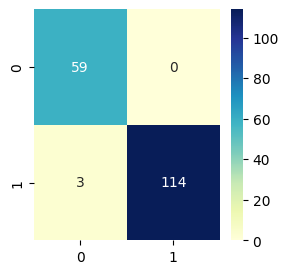

Classification Report for Random Forest:
------------------------------------------
              precision    recall  f1-score   support

      Closed       0.95      1.00      0.98        59
    Acquired       1.00      0.97      0.99       117

    accuracy                           0.98       176
   macro avg       0.98      0.99      0.98       176
weighted avg       0.98      0.98      0.98       176

Precision-Recall Curves for Random Forest= 0.9957022144522144


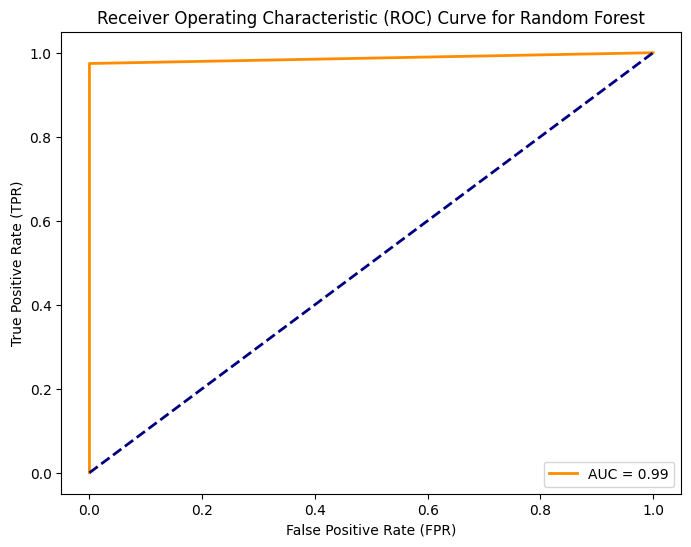

In [85]:
evaluation_metric(xtrain3, xtest3, ytrain3, ytest3, y_pred_rf3, "Random Forest", rf3)
plot_roc_models(ytest3, y_pred_rf3, "Random Forest")

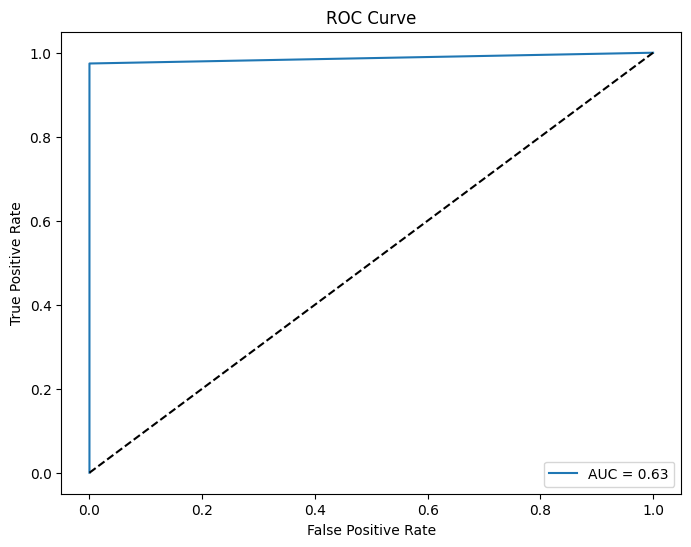

In [92]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(ytest3, y_pred_rf3)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()